In [1]:
import numpy as np
import skimage.transform
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import os
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest' 
matplotlib.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [4]:
LS_hdulist = fits.open("LyotStopReticula.fits", "readonly")
LS_orig = LS_hdulist[0].data

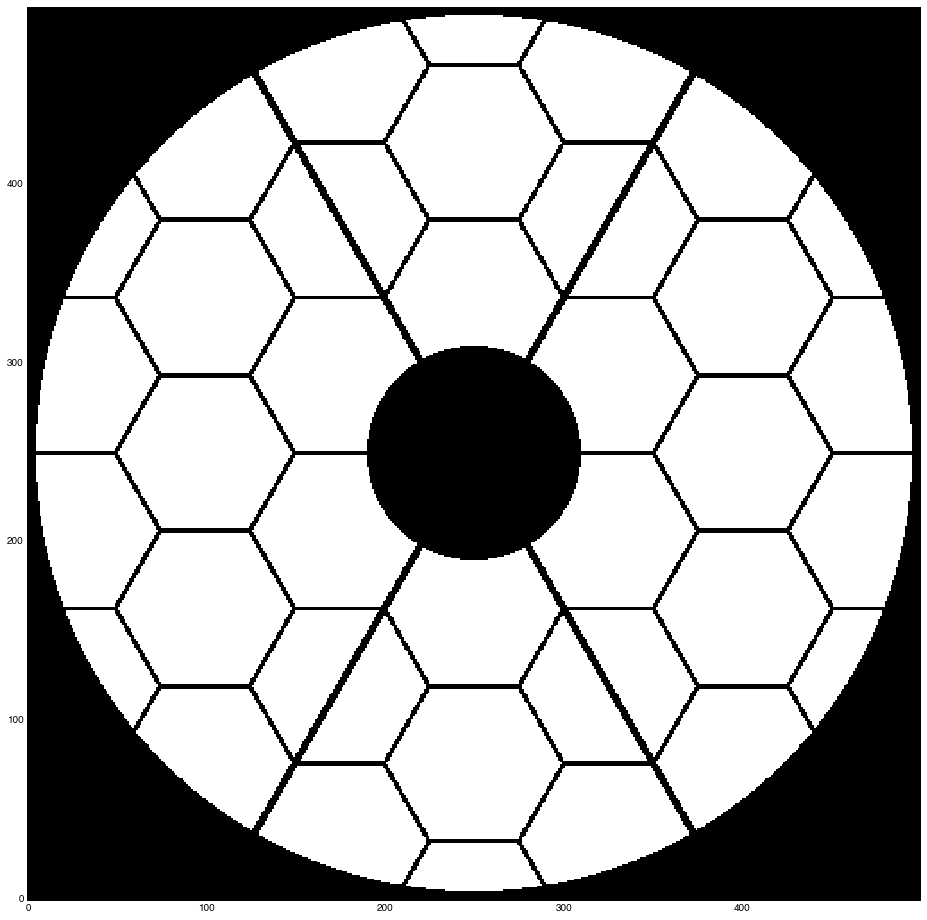

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(LS_orig)

In [6]:
LS_orig.shape

(500, 500)

In [8]:
N = LS_orig.shape[0]/2

In [10]:
dz_width = 1

In [11]:
max_shift = dz_width
shift_range = range(-max_shift,max_shift+1,1)

In [12]:
[Xshifts, Yshifts] = np.meshgrid(shift_range, shift_range)

In [13]:
Xshifts

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [14]:
Yshifts

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [15]:
allowed_shifts = np.less_equal(Xshifts**2 + Yshifts**2, max_shift**2)

In [18]:
allowed_shifts

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]], dtype=bool)

In [19]:
XYshifts_allowed = zip(Xshifts[allowed_shifts], Yshifts[allowed_shifts])

In [20]:
len(XYshifts_allowed)

5

In [24]:
padded_LS = np.ones(LS_orig.shape)
for (xshift,yshift) in XYshifts_allowed:
    LS_shifted = np.roll(np.roll(LS_orig, yshift, 0), xshift, 1) 
    padded_LS *= LS_shifted

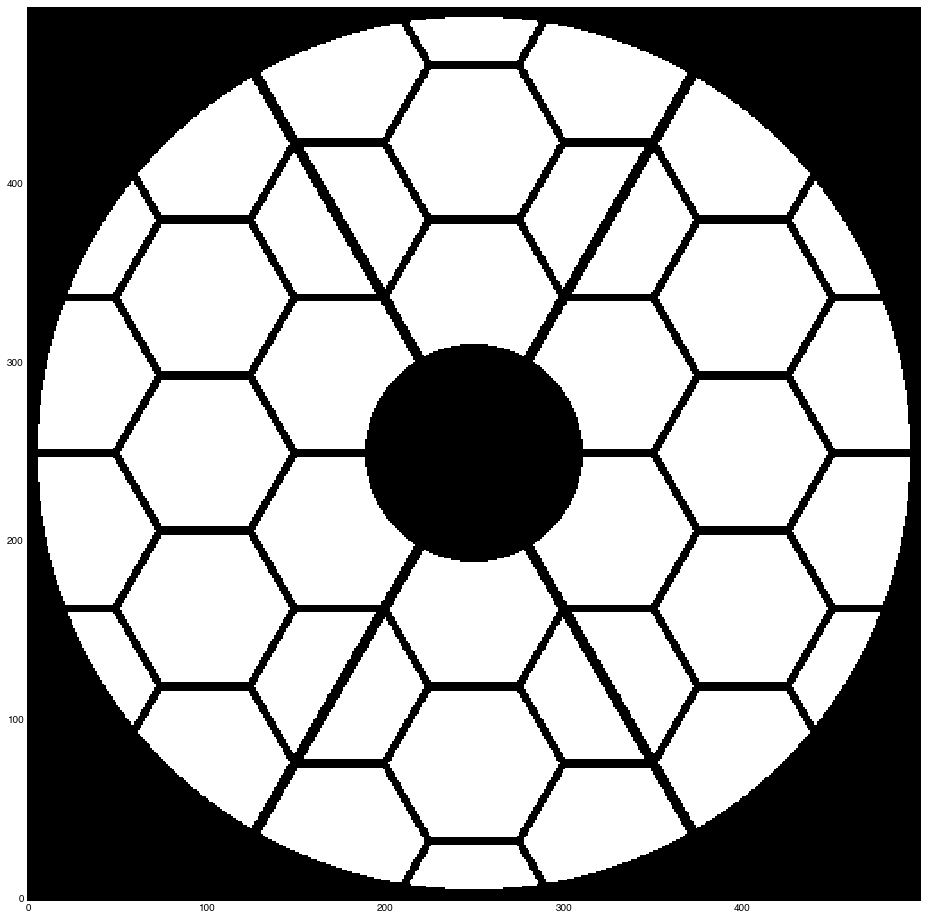

In [25]:
plt.figure(figsize=(16,16))
plt.imshow(padded_LS)

In [36]:
inv_thin_LS = np.ones(LS_orig.shape)
for (xshift,yshift) in XYshifts_allowed:
    inv_LS_shifted = 1-np.roll(np.roll(LS_orig, yshift, 0), xshift, 1) 
    inv_thin_LS *= inv_LS_shifted
thin_LS = 1-inv_thin_LS

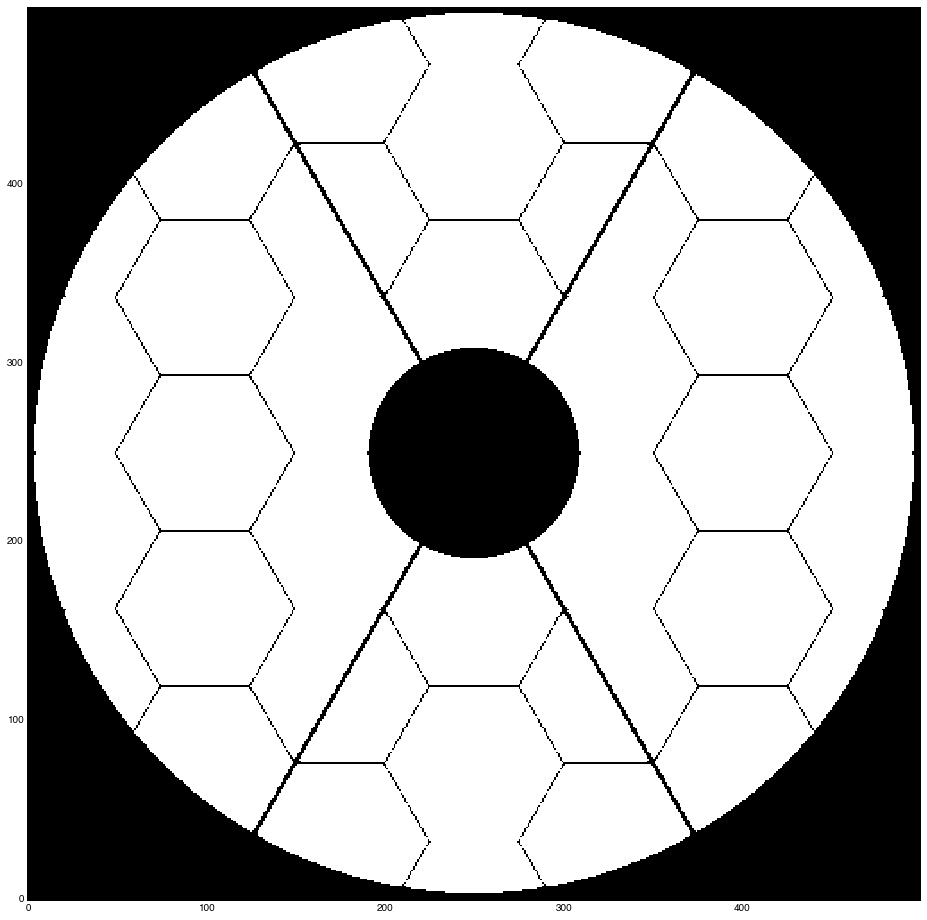

In [37]:
plt.figure(figsize=(16,16))
plt.imshow(thin_LS)

In [38]:
Lyot_dz = np.logical_xor(thin_LS, padded_LS)

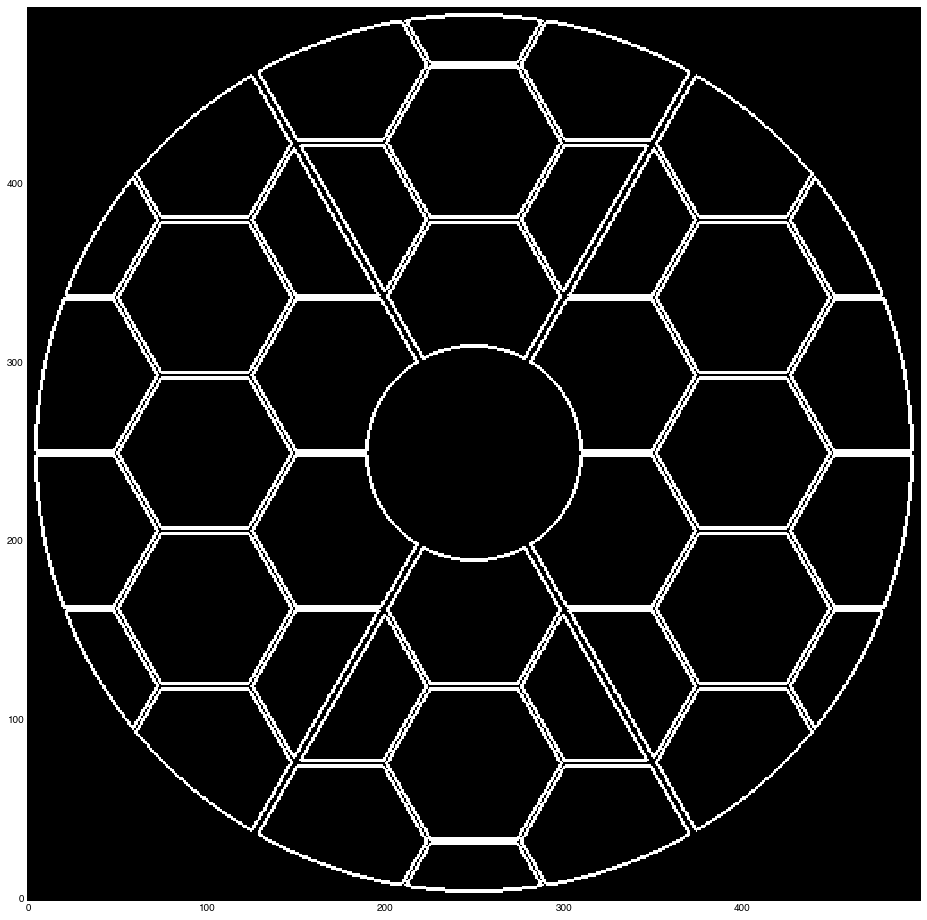

In [39]:
plt.figure(figsize=(16,16))
plt.imshow(Lyot_dz)

In [40]:
LS_LDZ_hdu = fits.PrimaryHDU(Lyot_dz.astype(int))
LS_LDZ_hdu.writeto("LyotStopReticula_LDZ_v2.fits")